In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

import scipy.signal

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


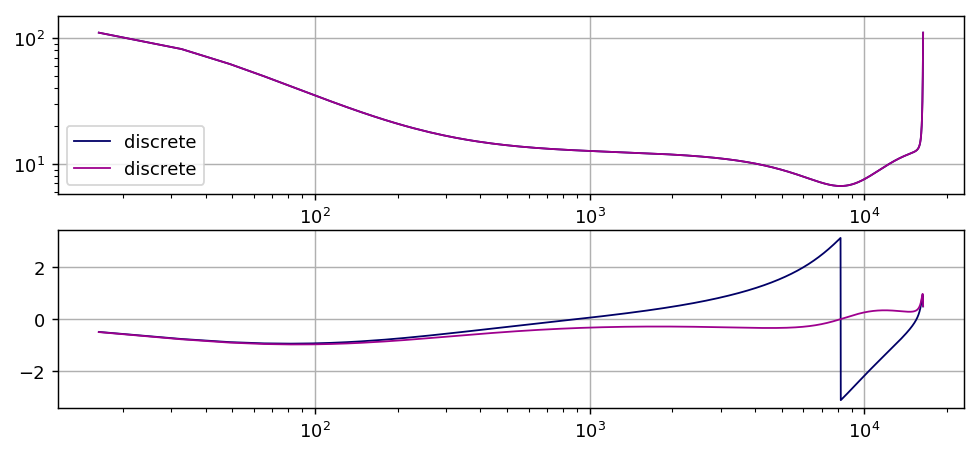

In [125]:
F_nyquist = 16384 / 2
F_AC = F_nyquist * 2 * np.arange(0, 1002) / 1002
    
ZPKz = (
    [
        .9,
        -.3,
    ], 
    [
        #.9,
        .99,
        #-.2,
    ], 
    10
)


b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

Fb.ax0.legend()

In [129]:
F_AC[1] + F_AC[-1]

In [66]:
np.fft.fft(b, len(F_exact)) / F_exact

array([ 0.01000000+0.j        ,  0.01001950+0.0062141j ,
        0.01007801+0.01242795j, ...,  0.01017552-0.01864132j,
        0.01007801-0.01242795j,  0.01001950-0.0062141j ])

In [67]:
np.fft.ifft(F_exact)

array([  1.00000506e+01 -1.63172839e-15j,
         3.90005012e+00 -2.80579160e-15j,
         1.16104962e+00 +1.71157165e-15j, ...,
         5.21800632e-05 -3.21419010e-15j,
         5.16582626e-05 -5.10695863e-15j,   5.11416799e-05 -1.05438956e-16j])

In [118]:
fj = F_exact
n = 2
m = 300
N = len(fj)
col = np.fft.ifft(fj)/(N+1);
col = col
row = np.fft.ifft(fj.conjugate()).conjugate()/(N+1);
row = row
Z = scipy.linalg.toeplitz(col,row[0:n]);
[U,S,V] = np.linalg.svd(Z[m:,:]);
arat = V[:,-1];
qj = np.fft.fft(arat, N);
bh = np.fft.ifft(qj * fj);
brat = bh[0:m+0];
pj = np.fft.fft(brat,N+0);
print(S)
qj

[  5.84188111e-04   1.88967123e-17]


array([-0.00710651 -2.84199487e-18j, -0.00712037 -4.41605600e-03j,
       -0.00716195 -8.83193800e-03j, ..., -0.00723124 +1.32474720e-02j,
       -0.00716195 +8.83193800e-03j, -0.00712037 +4.41605600e-03j])

In [119]:
brat / b

ValueError: operands could not be broadcast together with shapes (300,) (3,) 

In [120]:
arat / a

array([-0.71065111 -2.84199487e-16j, -0.71065111 -2.84199487e-16j])

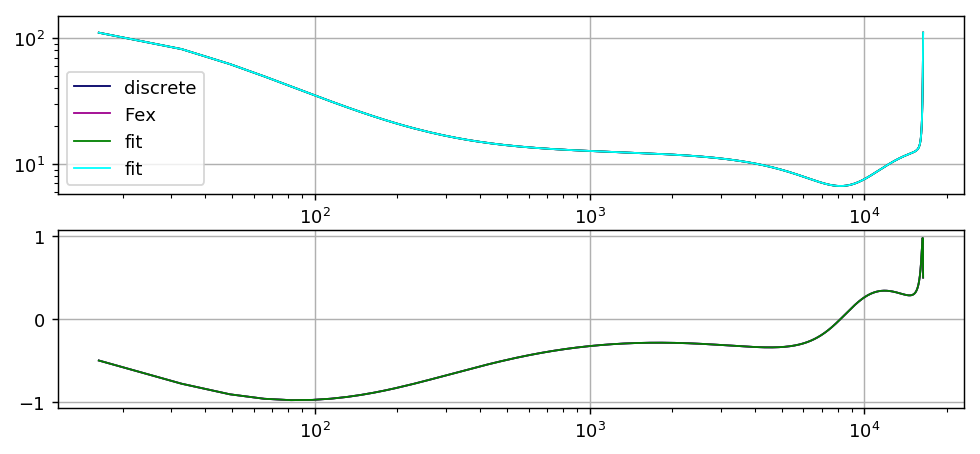

In [121]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(h), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'Fex')

w, h = scipy.signal.freqz(brat, arat, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'fit', color = 'green')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')

Fb.ax0.loglog(F_AC, abs(pj/qj), label = 'fit', color = 'cyan')
#Fb.ax0.set_xscale('linear')
#Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')
Fb.ax0.legend()

In [174]:
R = np.random.randn(len(F_AC)//2-1) + 1j*np.random.randn(len(F_AC)//2-1)
R2 = np.concatenate([[0], R, [0], R[::-1].conjugate()])
len(R2)
len(F_AC)

In [184]:
fj = F_exact * (1 + R2 / 100)
n = 2
m = 3
N = len(fj)
col = np.fft.ifft(fj)/(N+1);
col = col
row = np.fft.ifft(fj.conjugate()).conjugate()/(N+1);
row = row
Z = scipy.linalg.toeplitz(col,row[0:n]);
[U,S,V] = np.linalg.svd(Z[m:,:]);
arat = V[:,-1];
qj = np.fft.fft(arat, N);
bh = np.fft.ifft(qj * fj);
brat = bh[0:m+0];
pj = np.fft.fft(brat,N+0);
print(S)
qj

[ 0.01156266  0.00012332]


array([-0.00710896 +1.20157389e-18j, -0.00712279 -4.41164110e-03j,
       -0.00716429 -8.82310872e-03j, ..., -0.00723344 +1.32342294e-02j,
       -0.00716429 +8.82310872e-03j, -0.00712279 +4.41164110e-03j])

In [184]:
fj = F_exact * (1 + R2 / 100)
n = 2
m = 3
N = len(fj)
col = np.fft.ifft(fj)/(N+1);
col = col
row = np.fft.ifft(fj.conjugate()).conjugate()/(N+1);
row = row
Z = scipy.linalg.toeplitz(col,row[0:n]);
[U,S,V] = np.linalg.svd(Z[m:,:]);
arat = V[:,-1];
qj = np.fft.fft(arat, N);
bh = np.fft.ifft(qj * fj);
brat = bh[0:m+0];
pj = np.fft.fft(brat,N+0);
print(S)
qj

[ 0.01156266  0.00012332]


array([-0.00710896 +1.20157389e-18j, -0.00712279 -4.41164110e-03j,
       -0.00716429 -8.82310872e-03j, ..., -0.00723344 +1.32342294e-02j,
       -0.00716429 +8.82310872e-03j, -0.00712279 +4.41164110e-03j])

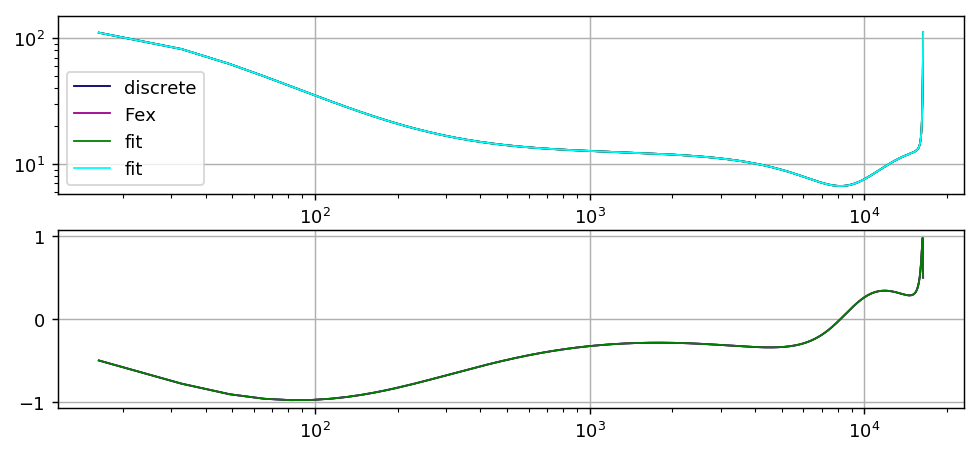

In [185]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(h), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'Fex')

w, h = scipy.signal.freqz(brat, arat, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'fit', color = 'green')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')

Fb.ax0.loglog(F_AC, abs(pj/qj), label = 'fit', color = 'cyan')
#Fb.ax0.set_xscale('linear')
#Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')
Fb.ax0.legend()